In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# read files, I've just prepared the train set. Must consider the test set.
df_train = pd.read_csv("housing_price_train.csv")
truth_df = df_train['SalePrice']

df_test = pd.read_csv("housing_price_test.csv")

In [3]:
# Check for content
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Finding missing values
miss_val = df_train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_train.isnull().sum().sort_values(ascending=False), columns=['MissingValueCount'])
miss_val[miss_val['MissingValueCount'] > 0]

,MissingValueCount
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [5]:
# Dropping columns with more than 70% missing values
# Set threshold
thres = int(len(df_train) * 0.7)
df_train.dropna(axis=1, thresh=thres, inplace=True)

In [6]:
# Dropping rows with not enaough data to evaluate
df_train.dropna(axis=0, thresh=len(df_train.columns) * 0.7, inplace=True)

In [7]:
# Removing spaces in column names
df_train.columns = df_train.columns.str.replace(' ',"")

In [8]:
# Find remaining columns with missing columns and fill missing data
# Finding missing values again
miss_val = df_train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_train.isnull().sum().sort_values(ascending=False), columns=['MissingValueCount'])
miss_val[miss_val['MissingValueCount'] > 0]

,MissingValueCount
LotFrontage,259
GarageType,81
GarageCond,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtCond,37


In [9]:
# Checking dtype
df_train['Electrical'].mode()

0    SBrkr
dtype: object

In [10]:
# fill some with median
df_train['LotFrontage'].fillna(value=df_train['LotFrontage'].median(), inplace=True)
df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].median(), inplace=True)

# fill some with mean
df_train['GarageYrBlt'].fillna(value=df_train['GarageYrBlt'].mean(), inplace=True)

# Finding missing values again
miss_val = df_train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_train.isnull().sum().sort_values(ascending=False), columns=['MissingValueCount'])
miss_val[miss_val['MissingValueCount'] > 0]

# Just make the missing values to the most common one, because fuck logic
for col in list(miss_val.index):
    df_train[col].fillna(value = df_train[col].mode()[0], inplace=True)

# Replace invalid inputed data with None
df_train.replace(['?','NA','NAN','none','','-','...','np'], 'None', inplace=True)

In [11]:
# Check that all null values are handeled
df_train.isnull().sum().sort_values(ascending=False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [12]:
# Delete rows who have managed to sneak thru
df_train.dropna(inplace=True)

In [13]:
df_train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


C:\Users\R_Lie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


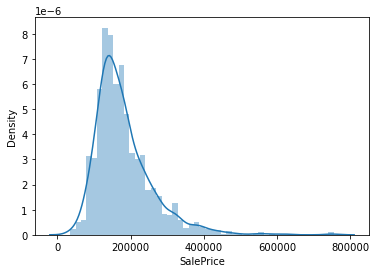

In [14]:
# Check distribution for target variable

sns.distplot(df_train.SalePrice)
plt.show()

C:\Users\R_Lie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


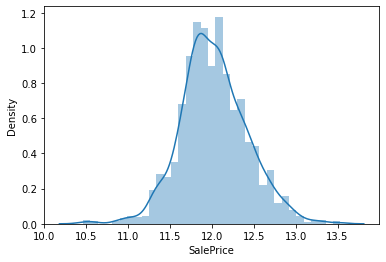

In [15]:
# Try to un-skew the distribution to get it more normal

sns.distplot(np.log(df_train.SalePrice))
plt.show()

In [16]:
display(df_train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.000000,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


In [17]:
len(list(df_train.select_dtypes(['object']).columns))
df_train.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
# Get numeric values for the objects
df_train = pd.get_dummies(df_train)

In [19]:
# Check correlation between features and sale price
df_train[df_train.columns].corr()['SalePrice'][:].sort_values()

ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
BsmtQual_TA        -0.498545
MasVnrType_None    -0.367456
                      ...   
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, Length: 272, dtype: float64

In [20]:
# Remove features with negative correlation
df_train = df_train.drop( ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],axis = 1)

<AxesSubplot:xlabel='GrLivArea'>

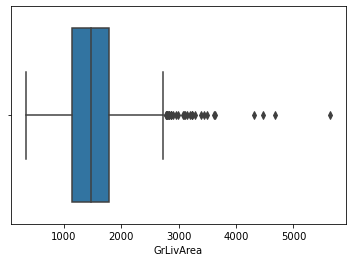

In [21]:
# Check for outliers and drop them
# Found a outlier in area
sns.boxplot(x=df_train['GrLivArea'])

In [22]:
i = df_train[(df_train.GrLivArea > 5000)].index
df_train = df_train.drop(i)

<AxesSubplot:xlabel='SalePrice'>

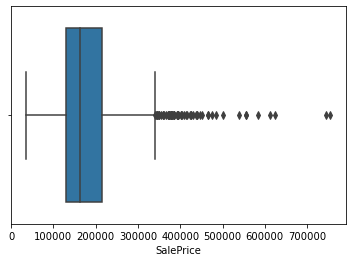

In [23]:
sns.boxplot(x=df_train['SalePrice'])

In [24]:
i = df_train[(df_train.SalePrice > 700000)].index
df_train = df_train.drop(i)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [27]:
# Prepare the training dataset and inits
feature_df = df_train.drop(['SalePrice'], axis=1)
truth_df = df_train['SalePrice']

max_depth = 5
min_var_score = 0.150


In [35]:
# Find some splits, calculate gini etc
def var_split(left_branch, right_branch, price_train):
    price_var = price_train.var()
    n = len(price_train.index)
    
    left_var = left_branch.var()
    right_var = right_branch.var()
    
    nleft = len(left_branch.index)
    nright = len(right_branch.index)
    
    score = (price_var - nleft / n * left_var - nright / n * right_var) / price_var
    
    return score

def find_best_split(feature_train, price_train, min_var_score):
    
    for feature in feature_train.columns:
        thresholds = feature_train[feature].unique().tolist() # make list of possible unique thresholds
        thresholds.sort() 
        thresholds = thresholds[1:] # let the first split start between 1st value and rest
        for thresh in thresholds:
            left_index = feature_train[feature] < thresh
            prices_left, prices_right = price_train[left_index], price_train[~left_index]
            var_score = var_split(prices_left, prices_right, price_train)
            if var_score < min_var_score: 
                min_var_score = var_score
                best_split = thresh
                best_feature = feature
    return {'feature': best_feature, 'threshold': best_split}

In [36]:
# Time to do some actual work...
# Make some branches

def split_branch(feature_train, price_train, depth, max_depth):
    
    # Check if we reached end of depth
    if depth == max_depth or len(feature_train)<4:
        return {'prediction': np.mean(price_train)}
    
    split = find_best_split(feature_train, price_train, min_var_score)
    left_index = feature_train[split['feature']] < split['threshold']
    split['left'] = split_branch(feature_train[left_index], price_train[left_index], depth + 1, max_depth)
    split['right'] = split_branch(feature_train[~left_index], price_train[~left_index], depth + 1, max_depth)
    
    return split

In [37]:
# build the tree!
branches = split_branch(feature_df, truth_df, 0, max_depth)

In [ ]:
# is it working?
feature_test_df = df_test.drop(['SalePrice'], axis=1)
truth_test_df = df_test['SalePrice']

def predict(feature_df, split):
    prediction = None
    # make a for-loop here so I can check the whole test set 
    while prediction = None:
        feature, threshold = split['feature'], split['threshold']
        if feature_df[feature] < threshold:
            split = split['left']
        else:
            split = split['right']
        prediction = split.get('prediction', None) #make to append if running full test sett?
    return prediction

In [40]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(branches)

{   'feature': 'GarageQual_Ex',
    'left': {   'feature': 'OpenPorchSF',
                'left': {   'feature': 'SaleType_ConLI',
                            'left': {   'feature': 'WoodDeckSF',
                                        'left': {   'feature': 'ExterCond_Ex',
                                                    'left': {   'prediction': 179842.29958391123},
                                                    'right': {   'prediction': 201333.33333333334},
                                                    'threshold': 1},
                                        'right': {'prediction': 266250.0},
                                        'threshold': 736},
                            'right': {   'feature': 'LotArea',
                                         'left': {   'prediction': 146666.66666666666},
                                         'right': {'prediction': 280975.0},
                                         'threshold': 12354},
                            'thres